In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path
import numpy as np
import sys
sys.path.append("../model/")
sys.path.append("../tools/")
from MLP_classifier import MultiClassClassifier
from dataset import TaskAWithLabel, SimpleDataset
from constants import SEED, REAL_LABEL, FAKE_LABEL
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [98]:
device = "cuda:0"

model_submission = MultiClassClassifier(n_classes=2).to(device)

model_submission.load_state_dict(torch.load("../model/checkpoints/binary_train_real_fake_2k_fine_tune_meta_test.pt"))
# model_submission.load_state_dict(torch.load("../model/checkpoints/ft_taskA.pt"))
model_submission.eval()

test_data_clip = TaskAWithLabel(path_to_csv="../../misc/scanFinal.csv",
                                      path_to_taskA="/data4/saland/data/taskA.pt")

100%|██████████| 10080/10080 [00:05<00:00, 1742.63it/s]


In [99]:
model_submission.get_model_accuracy_binary(test_data_clip.features,test_data_clip.label,device,True)

0.886904776096344

In [100]:
pred = model_submission.predict_binary(test_data_clip.features,device,True)
cm = confusion_matrix(test_data_clip.label,pred.cpu())

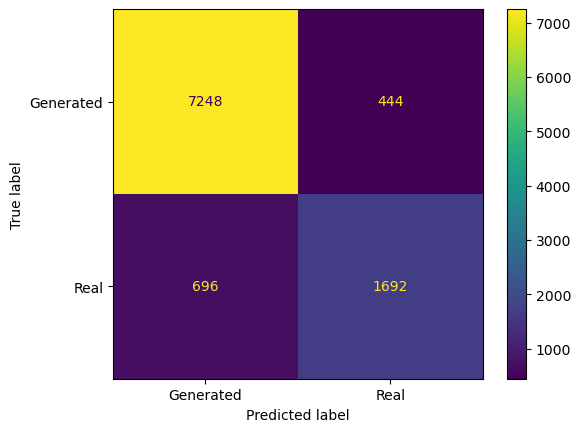

In [101]:
labels = 2*[""]
labels[REAL_LABEL] = "Real"
labels[FAKE_LABEL] = "Generated"
ConfusionMatrixDisplay(cm,display_labels=labels).plot()

In [102]:
len(test_data_clip)

10080

In [103]:
fn = 444/(7248 + 444)
fp = 696/(696 + 1692)
print("false positive rate:",fp)
print("false negative rate:",fn)

false positive rate: 0.2914572864321608
false negative rate: 0.057722308892355696


In [106]:
fn_idx = torch.argwhere(torch.logical_and((pred == REAL_LABEL).cpu(),test_data_clip.label == FAKE_LABEL)).flatten() # false negative
fp_idx = torch.argwhere(torch.logical_and((pred == FAKE_LABEL).cpu(),test_data_clip.label == REAL_LABEL)).flatten() # false positive_LABEL).cpu(),test

fn_names = [test_data_clip.name[i] for i in fn_idx]
fp_names = [test_data_clip.name[i] for i in fp_idx]
print("false negative count:",len(fn_names))
display(fn_names)
print("false positive count:",len(fp_names))
display(fp_names)

false negative count: 444


['A_01oi53jf.png',
 'A_05zjma5u.png',
 'A_0hq0vwki.png',
 'A_0keg25wk.png',
 'A_0mjysn7h.png',
 'A_0ne326r6.png',
 'A_0rquvqci.png',
 'A_0soehth5.png',
 'A_0tg29n19.png',
 'A_10lekarr.png',
 'A_13j5qxt9.png',
 'A_16e8zfok.png',
 'A_179nuwet.png',
 'A_18yaxuf9.png',
 'A_1avx296m.png',
 'A_1c1x9seq.png',
 'A_1er27ckn.png',
 'A_1i03zmu4.png',
 'A_1q4nqfh2.png',
 'A_1sbi9lf6.png',
 'A_1slxr761.png',
 'A_1tyq174r.png',
 'A_24jus2t4.png',
 'A_2duer7ht.png',
 'A_2e2r46bd.png',
 'A_2f8hj5dh.png',
 'A_2j6eru49.png',
 'A_2k93aiey.png',
 'A_2kg78oxr.png',
 'A_2lyg7opo.png',
 'A_2n2z11pm.png',
 'A_2o603lv9.png',
 'A_2qj31rjn.png',
 'A_2qsso5vu.png',
 'A_2rj2omox.png',
 'A_2suzugji.png',
 'A_2wlah8oz.png',
 'A_2xtd2gcw.png',
 'A_2xxqt94l.png',
 'A_31v68iti.png',
 'A_32krdsat.png',
 'A_32zgtyhy.png',
 'A_34s4vyyv.png',
 'A_3dsfpvg1.png',
 'A_3guzdhb5.png',
 'A_3kn5tfs5.png',
 'A_3l397pn7.png',
 'A_3p0w7140.png',
 'A_3q0xhjt6.png',
 'A_3qlzw1mz.png',
 'A_3umeagec.png',
 'A_3w4uokl4.png',
 'A_3xjc4qq1

false positive count: 696


['A_00el4hwr.png',
 'A_022zjg92.png',
 'A_02rbamyc.png',
 'A_045d4je5.png',
 'A_04h0ah4l.png',
 'A_06z997qo.png',
 'A_0clte66r.png',
 'A_0j4wfbs5.png',
 'A_0lvi7z76.png',
 'A_0lvs1gvi.png',
 'A_0m2tywsm.png',
 'A_0nidni48.png',
 'A_0o3m6c6f.png',
 'A_0r34xr1q.png',
 'A_0samijlo.png',
 'A_0stc84kc.png',
 'A_0y6esu9j.png',
 'A_0zto3q7v.png',
 'A_0zu74yst.png',
 'A_12109b5j.png',
 'A_1457sx4b.png',
 'A_1a9w31kp.png',
 'A_1akg1wht.png',
 'A_1cxsaj3t.png',
 'A_1df4f84s.png',
 'A_1dnlwdp0.png',
 'A_1htgpy35.png',
 'A_1mgcdekc.png',
 'A_1muwk4h2.png',
 'A_1nioccsh.png',
 'A_1t3wtscr.png',
 'A_1yc7ku1c.png',
 'A_1z7if37a.png',
 'A_21wa7lmp.png',
 'A_222r65bk.png',
 'A_22itqlro.png',
 'A_22z4gtuh.png',
 'A_24a4jfg6.png',
 'A_267ee1ok.png',
 'A_295d5uc1.png',
 'A_2d6x7rge.png',
 'A_2e9zn86l.png',
 'A_2fzrjwrq.png',
 'A_2h47eex9.png',
 'A_2jpzq1le.png',
 'A_2lfozv1c.png',
 'A_2lj7be9l.png',
 'A_2ql651cw.png',
 'A_2ufgz0vn.png',
 'A_2uscgbqj.png',
 'A_2vihyyga.png',
 'A_2wezkbxc.png',
 'A_2xj7izrf

In [107]:
idx_real = torch.argwhere(test_data_clip.label == REAL_LABEL)
idx_fake = torch.argwhere(test_data_clip.label == FAKE_LABEL)
with torch.no_grad():
    logits_real = model_submission(test_data_clip.features[idx_real])
    logits_fake = model_submission(test_data_clip.features[idx_fake])

In [108]:
logits_real.shape

torch.Size([2388, 1, 2])

(array([[  4.,   9.,  11.,  31.,  40.,  91., 106., 129., 162., 212., 227.,
         224., 202., 151., 153., 133., 109., 118., 109.,  67.,  40.,  30.,
          13.,   8.,   4.,   4.,   1.,   0.,   0.,   0.],
        [  0.,   0.,   1.,   4.,   4.,   8.,  11.,  34.,  39.,  67., 108.,
         113., 100., 141., 142., 145., 191., 228., 212., 209., 166., 136.,
         120.,  89.,  51.,  33.,  18.,  10.,   7.,   1.]]),
 array([-11.7613821 , -10.94474506, -10.12810802,  -9.31147099,
         -8.49483395,  -7.67819738,  -6.86156034,  -6.04492331,
         -5.22828627,  -4.41164923,  -3.59501266,  -2.77837563,
         -1.96173859,  -1.14510155,  -0.32846451,   0.48817253,
          1.30480957,   2.12144661,   2.93808365,   3.75472069,
          4.57135677,   5.38799381,   6.20463085,   7.02126789,
          7.83790493,   8.65454197,   9.47117901,  10.28781605,
         11.10445309,  11.92109013,  12.73772717]),
 <a list of 2 BarContainer objects>)

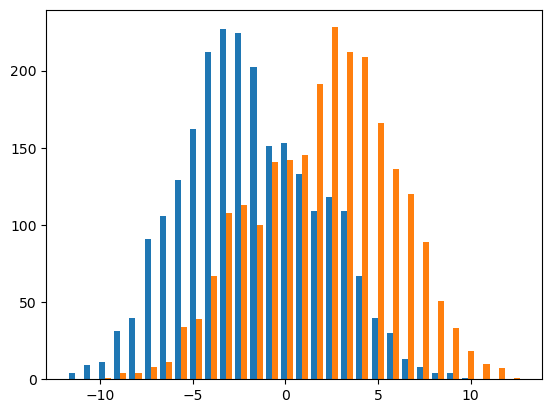

In [109]:
import matplotlib.pyplot as plt

plt.hist(logits_real.cpu().numpy()[:,0,:],bins=30)

(array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         1.000e+00, 1.000e+00, 0.000e+00, 4.000e+00, 6.000e+00, 2.100e+01,
         3.100e+01, 1.000e+02, 2.780e+02, 5.360e+02, 1.042e+03, 1.339e+03,
         1.242e+03, 9.370e+02, 7.910e+02, 5.360e+02, 3.830e+02, 2.190e+02,
         1.220e+02, 4.200e+01, 2.800e+01, 1.600e+01, 1.100e+01, 6.000e+00],
        [7.000e+00, 1.200e+01, 1.500e+01, 2.800e+01, 4.800e+01, 1.240e+02,
         2.300e+02, 3.840e+02, 5.490e+02, 8.030e+02, 9.370e+02, 1.270e+03,
         1.296e+03, 1.007e+03, 5.360e+02, 2.780e+02, 1.030e+02, 3.300e+01,
         1.900e+01, 6.000e+00, 5.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]]),
 array([-21.21926498, -19.79545593, -18.37164688, -16.94783783,
        -15.52402973, -14.10022068, -12.67641258, -11.25260353,
         -9.82879448,  -8.40498543,  -6.98117638,  -5.55736828,
         -4.13356018,  -2.70975113,  -1.28594208,   0.

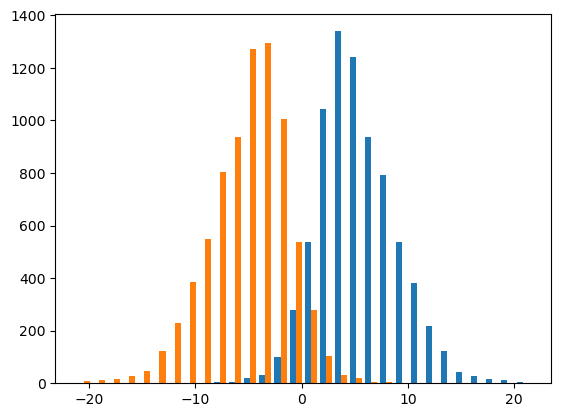

In [110]:
import matplotlib.pyplot as plt

plt.hist(logits_fake.cpu().numpy()[:,0,:],bins=30)